In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from IPython.display import display
from sklearn.metrics import mean_squared_error

In [22]:
df = pd.read_csv("../norm_data.csv")
display(df)
display(df.columns)
df_copy = df.copy()

,Unnamed: 0,timestamp,avg_energy,num_houses,is_holiday,visibility,temperature,dewPoint,pressure,windSpeed,precipType,humidity,hour_minute,month,day,year,is_weekday
0,0,2011-11-23 09:00:00+00:00,0.496932,2.0,0,0.259284,0.275064,0.490958,0.762907,0.118345,0,0.979768,0.382979,0.909091,0.733333,0.0,1
1,1,2011-11-23 09:30:00+00:00,0.486617,2.0,0,0.300829,0.284254,0.504870,0.766126,0.121289,0,0.982632,0.404255,0.909091,0.733333,0.0,1
2,2,2011-11-23 10:00:00+00:00,0.158681,6.0,0,0.372542,0.298686,0.517080,0.768527,0.132376,0,0.966876,0.425532,0.909091,0.733333,0.0,1
3,3,2011-11-23 10:30:00+00:00,0.015988,6.0,0,0.496269,0.323540,0.521713,0.768571,0.155500,0,0.904222,0.446809,0.909091,0.733333,0.0,1
4,4,2011-11-23 11:00:00+00:00,0.047670,7.0,0,0.614973,0.349342,0.526457,0.766900,0.177141,0,0.837959,0.468085,0.909091,0.733333,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39722,39722,2014-02-27 22:00:00+00:00,0.536284,4986.0,0,0.847610,0.255642,0.389149,0.443133,0.201194,0,0.786392,0.936170,0.090909,0.866667,1.0,1
39723,39723,2014-02-27 22:30:00+00:00,0.498642,4987.0,0,0.843370,0.251805,0.388935,0.435741,0.193313,0,0.798160,0.957447,0.090909,0.866667,1.0,1
39724,39724,2014-02-27 23:00:00+00:00,0.413828,4987.0,0,0.849446,0.251180,0.388145,0.427603,0.183154,0,0.799284,0.978723,0.090909,0.866667,1.0,1
39725,39725,2014-02-27 23:30:00+00:00,0.318439,4987.0,0,0.808383,0.250244,0.387023,0.419580,0.175031,0,0.797509,1.000000,0.090909,0.866667,1.0,1


Index(['Unnamed: 0', 'timestamp', 'avg_energy', 'num_houses', 'is_holiday',
       'visibility', 'temperature', 'dewPoint', 'pressure', 'windSpeed',
       'precipType', 'humidity', 'hour_minute', 'month', 'day', 'year',
       'is_weekday'],
      dtype='object')

In [ ]:
df.plot(x='timestamp', y='avg_energy', figsize=(12, 8))

In [3]:
df = df.drop(['timestamp', 'Unnamed: 0'], axis=1)
display(df.columns)

Index(['avg_energy', 'num_houses', 'is_holiday', 'visibility', 'temperature',
       'dewPoint', 'pressure', 'windSpeed', 'precipType', 'humidity',
       'hour_minute', 'month', 'day', 'year', 'is_weekday'],
      dtype='object')

In [14]:
test = df.iloc[df.index > 25000]
train = df.iloc[df.index <= 25000]
X_test = test.drop(['avg_energy'], axis=1)
y_test = test['avg_energy']
X_train = train.drop(['avg_energy'], axis=1)
y_train = train['avg_energy']

In [15]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],  verbose=100)

[0]	validation_0-rmse:0.20085	validation_1-rmse:0.19031
[100]	validation_0-rmse:0.09136	validation_1-rmse:0.08392
[200]	validation_0-rmse:0.05341	validation_1-rmse:0.05261
[300]	validation_0-rmse:0.04084	validation_1-rmse:0.04509
[400]	validation_0-rmse:0.03565	validation_1-rmse:0.04255
[500]	validation_0-rmse:0.03265	validation_1-rmse:0.04144
[600]	validation_0-rmse:0.03063	validation_1-rmse:0.04125
[700]	validation_0-rmse:0.02923	validation_1-rmse:0.04103
[800]	validation_0-rmse:0.02834	validation_1-rmse:0.04090
[867]	validation_0-rmse:0.02780	validation_1-rmse:0.04097


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

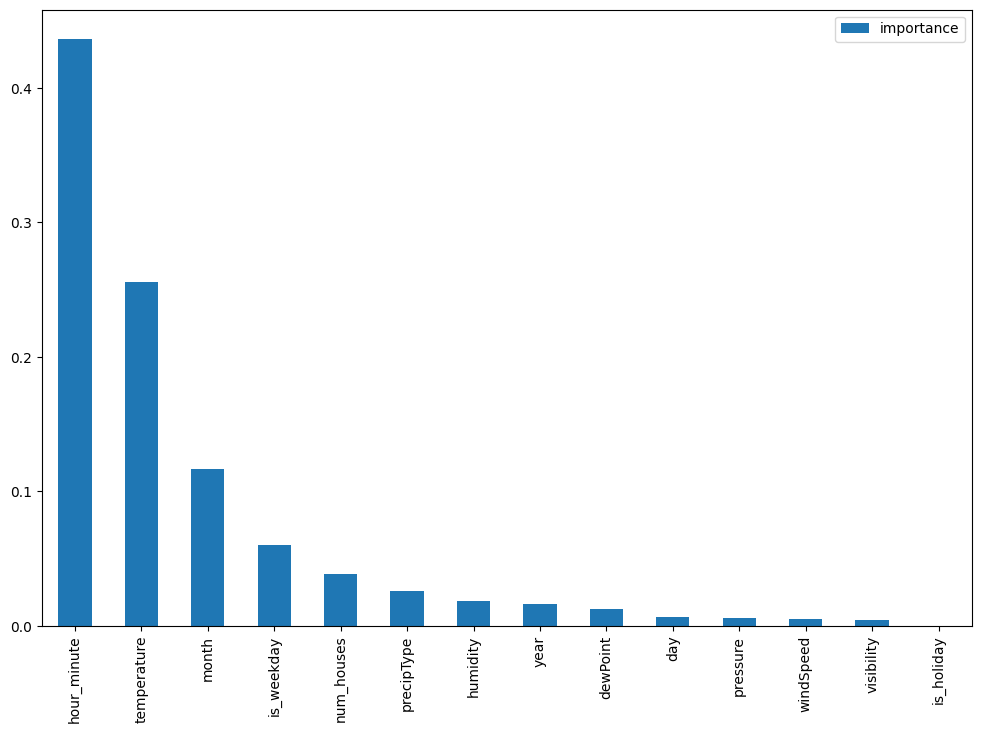

In [16]:
pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance']).sort_values(by='importance', ascending=False).plot(kind='bar', figsize=(12, 8))

<Axes: xlabel='timestamp'>

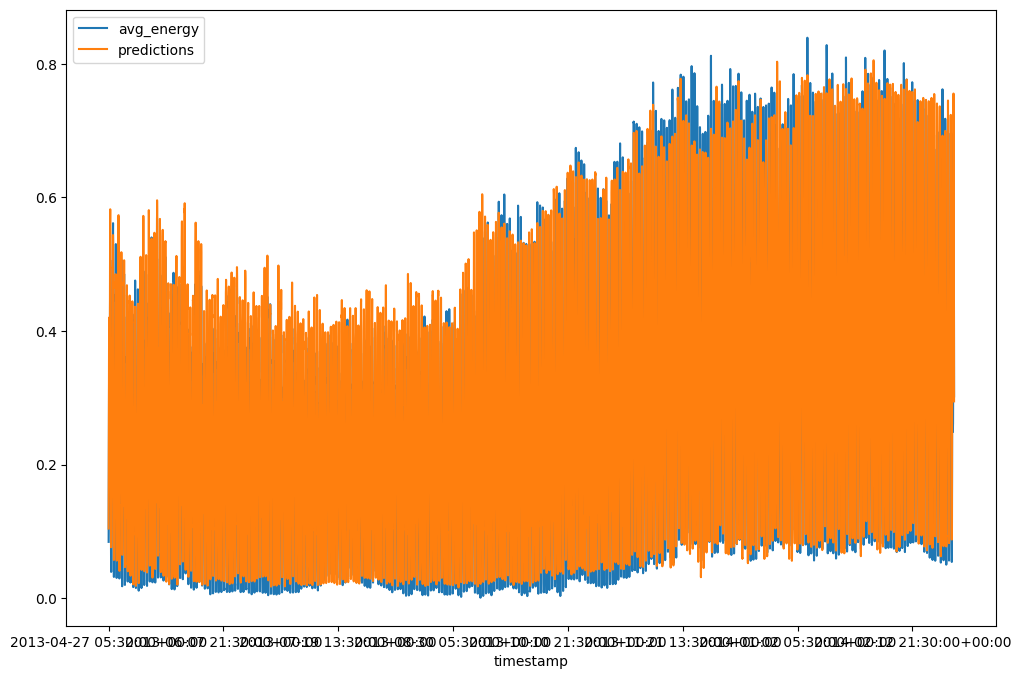

In [23]:
predictions = reg.predict(X_test)
len(predictions)
test['predictions'] = predictions
test['timestamp'] = df_copy.iloc[df.index > 25000]['timestamp']
test.plot(x='timestamp', y=['avg_energy', 'predictions'], figsize=(12, 8))